In [4]:
# NM_001385936.1
# https://www.ncbi.nlm.nih.gov/nuccore/NM_001385936.1?report=fasta&log$=seqview 


#### **Introduction**
This repository contains code and data for a COVID-19 sequencing and analysis project using Biopython. The project aims to determine the frequency of amino acids, AT and GC content, DNA composition, and generate bar plots to visualize the results.
+ Table of Contents
+ Background
+ Installation
+ Usage
+ Data
+ Methods
+ Results
+ Contributing
+ License
##### **Background**
COVID-19, caused by the SARS-CoV-2 virus, is a global pandemic. Understanding the genetic makeup of the virus is crucial for research and vaccine development. This project focuses on analyzing COVID-19 sequences to gain insights into its genetic composition.

Installation
To begin, Biopython library needs to be  installed, and the subsequent libraries need to be imported.

In [5]:
pip install Biopython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from Bio import SeqIO

##### Data
The Data used was gotten from NCBI.

In [7]:
# Reading the fasta file
path = r"c:\Users\VERITY HARUNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\SeqIO\sequence.fasta"
covid_record = SeqIO.read(path,'fasta')
covid_record

SeqRecord(seq=Seq('GTTCCCTCCTCCCTCGGCAGCCGCGGCGGCAGCAGGAGAAGGCGGCGGCGGCGG...AAA'), id='NM_001385936.1', name='NM_001385936.1', description='NM_001385936.1 Homo sapiens pleckstrin homology domain containing A5 (PLEKHA5), transcript variant 19, mRNA', dbxrefs=[])

In [8]:
covid_dna = covid_record.seq
covid_dna

Seq('GTTCCCTCCTCCCTCGGCAGCCGCGGCGGCAGCAGGAGAAGGCGGCGGCGGCGG...AAA')

In [9]:
#len of DNA
len(covid_dna)

4416

In [10]:
#Transcription 
# DNA to mRNA
covid_mrna = covid_dna.transcribe()

In [11]:
covid_mrna

Seq('GUUCCCUCCUCCCUCGGCAGCCGCGGCGGCAGCAGGAGAAGGCGGCGGCGGCGG...AAA')

In [12]:
# Translation 
# mRNA to AA
covid_protein = covid_mrna.translate()

In [13]:
covid_protein

Seq('VPSSLGSRGGSRRRRRRRLGIRHGGGSEPGVDLPAPVLDLRDHQGRPSLLHQRG...VLK')

### Sequence Analysis
+ Freq of N/Bases and Amino Acid

In [14]:
# check for N or Base
covid_dna

Seq('GTTCCCTCCTCCCTCGGCAGCCGCGGCGGCAGCAGGAGAAGGCGGCGGCGGCGG...AAA')

In [15]:
from collections import Counter

In [16]:
covid_ncount = Counter(covid_dna)
covid_ncount

Counter({'A': 1486, 'T': 1103, 'G': 947, 'C': 880})

In [17]:
# plot
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

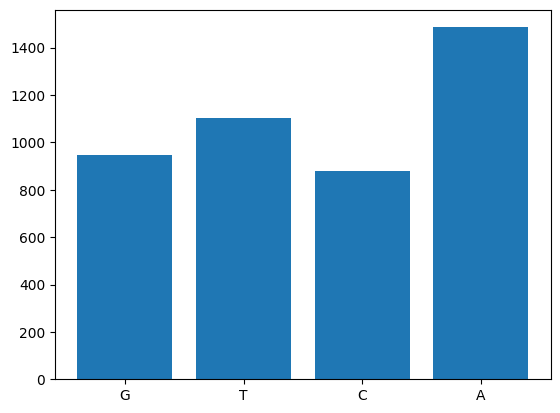

In [18]:
plt.bar(covid_ncount.keys(), covid_ncount.values())

In [19]:
# molecular weight
from Bio.SeqUtils import molecular_weight

In [21]:
molecular_weight(covid_dna)

1367205.9451999879

### DNA composition
+ GC Content
+ AT content

In [24]:
# GC content
from Bio.SeqUtils import GC, GC123, GC_skew, gc_fraction

In [26]:
GC(covid_dna)

c:\Users\VERITY HARUNA\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


41.37228260869565

In [27]:
# AT cONTENT
def at_content(seq):
    result = float(seq.count('A')+seq.count('T'))/len(seq)*100
    return result

In [28]:
at_content(covid_dna)

58.627717391304344

In [29]:
# GC skew
# lagging or leading strands
GC_skew(covid_dna)

[0.11428571428571428,
 -0.1044776119402985,
 0.14285714285714285,
 -0.024390243902439025,
 0.15,
 0.1111111111111111,
 0.2857142857142857,
 -0.12195121951219512,
 0.2558139534883721,
 -0.3939393939393939,
 0.4,
 -0.043478260869565216,
 0.02127659574468085,
 0.23809523809523808,
 -0.16,
 0.16981132075471697,
 -0.4418604651162791,
 -0.06382978723404255,
 -0.15789473684210525,
 -0.12195121951219512,
 0.24324324324324326,
 0.06976744186046512,
 0.1111111111111111,
 0.18181818181818182,
 0.2653061224489796,
 0.16666666666666666,
 0.24324324324324326,
 -0.2727272727272727,
 0.3333333333333333,
 0.09090909090909091,
 0.2,
 -0.15151515151515152,
 0.15789473684210525,
 0.02702702702702703,
 -0.23076923076923078,
 0.0,
 0.14285714285714285,
 -0.15789473684210525,
 0.13333333333333333,
 -0.2,
 0.1111111111111111,
 -0.125,
 0.17647058823529413,
 -0.09090909090909091,
 0.5]

In [30]:
from Bio.SeqUtils import MeltingTemp as mt

In [31]:
mt.Tm_GC(covid_dna)

76.72966837632573

In [32]:
# check for number of Amino Acid present
covid_pr_freq = Counter(covid_protein)


<BarContainer object of 21 artists>

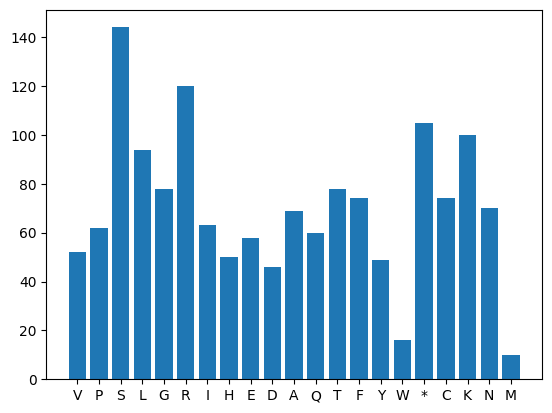

In [33]:
plt.bar(covid_pr_freq.keys(), covid_pr_freq.values())

In [34]:
# most common AA
Counter(covid_protein).most_common(5)

[('S', 144), ('R', 120), ('*', 105), ('K', 100), ('L', 94)]

In [35]:
# longest seq AA befoore a stop codon 
covid_clean = covid_protein.split("*")
covid_clean

[Seq('VPSSLGSRGGSRRRRRRRLGIRHGGGSEPGVDLPAPVLDLRDHQGRPSLLHQRG...IYF'),
 Seq('RCKILYKP'),
 Seq(''),
 Seq('KESDLQTSSHRTTITGQLYFCSE'),
 Seq('TDCCNHDI'),
 Seq('RKEGTANKYDK'),
 Seq('SF'),
 Seq('L'),
 Seq('RDFRLCSASNEPCRQNFTSFKKSS'),
 Seq('FWKEVKFN'),
 Seq('KES'),
 Seq('CTGCQTRLAL'),
 Seq('TGQYWHEIVEETLVCAF'),
 Seq('PLPLLL'),
 Seq('R'),
 Seq('ERRGYPGKHTVT'),
 Seq('FSDSFAYL'),
 Seq('RSH'),
 Seq('SQICF'),
 Seq('GSPSKHADLLFLH'),
 Seq('YRKGNGVVDESHVRCCPSTDRTCEKSGQDYI'),
 Seq('KCTN'),
 Seq('RNQ'),
 Seq('HSQP'),
 Seq('SAN'),
 Seq('TRDPKQSKKQGNEQN'),
 Seq('RKKGIRS'),
 Seq('KIWISEGWSR'),
 Seq('TLNKN'),
 Seq(''),
 Seq('CKAEFSAI'),
 Seq('I'),
 Seq('EWVSMPCSDCALQTNQLEQFREQNSQC'),
 Seq('PGRS'),
 Seq('RWKSPQYRALIHRGRSSHTENKFNAAVGTVD'),
 Seq('NPEGEGS'),
 Seq('RRNQGSNFLPNITKKYAKSQSPDYGPLP'),
 Seq('RL'),
 Seq('NTPKKQQDKA'),
 Seq('KYLQCNPFHS'),
 Seq('QDIRTRSGGETEVHER'),
 Seq('HNVAALRMAAASVL'),
 Seq('QTEHPPSTQYFE'),
 Seq('SQNHGKYF'),
 Seq('PDNALYSHITFPRVNSCLSGILPSTNLQIGSVFTNSERRCDNRPQTQGPSP'),
 Seq('ACLCA'),
 

In [36]:
covid_clean = [ str(i) for i in covid_clean]
covid_clean

['VPSSLGSRGGSRRRRRRRLGIRHGGGSEPGVDLPAPVLDLRDHQGRPSLLHQRGGQEHHLAAPRHRRGGGHRTPAAEHRFAYWLGRSIYF',
 'RCKILYKP',
 '',
 'KESDLQTSSHRTTITGQLYFCSE',
 'TDCCNHDI',
 'RKEGTANKYDK',
 'SF',
 'L',
 'RDFRLCSASNEPCRQNFTSFKKSS',
 'FWKEVKFN',
 'KES',
 'CTGCQTRLAL',
 'TGQYWHEIVEETLVCAF',
 'PLPLLL',
 'R',
 'ERRGYPGKHTVT',
 'FSDSFAYL',
 'RSH',
 'SQICF',
 'GSPSKHADLLFLH',
 'YRKGNGVVDESHVRCCPSTDRTCEKSGQDYI',
 'KCTN',
 'RNQ',
 'HSQP',
 'SAN',
 'TRDPKQSKKQGNEQN',
 'RKKGIRS',
 'KIWISEGWSR',
 'TLNKN',
 '',
 'CKAEFSAI',
 'I',
 'EWVSMPCSDCALQTNQLEQFREQNSQC',
 'PGRS',
 'RWKSPQYRALIHRGRSSHTENKFNAAVGTVD',
 'NPEGEGS',
 'RRNQGSNFLPNITKKYAKSQSPDYGPLP',
 'RL',
 'NTPKKQQDKA',
 'KYLQCNPFHS',
 'QDIRTRSGGETEVHER',
 'HNVAALRMAAASVL',
 'QTEHPPSTQYFE',
 'SQNHGKYF',
 'PDNALYSHITFPRVNSCLSGILPSTNLQIGSVFTNSERRCDNRPQTQGPSP',
 'ACLCA',
 'QKVSASWPDFTVC',
 'SPEPPRENDERK',
 'TYYHHGSHND',
 'ELGAKTPTVPAILKTEEQDKSILSVTR',
 'R',
 'RHIIQIQT',
 'RSRY',
 'CQVKPIM',
 'TR',
 'SGACSGRETSATPQGEIHA',
 'ASFAISQPRDRNACR',
 'PSSHSDSGVTKG',
 'FTKWTA',


In [37]:
import pandas as pd
df = pd.DataFrame({"amino_acids": covid_clean})

In [38]:
df['count'] = df['amino_acids'].str.len()

In [39]:
df.head()

,amino_acids,count
0,VPSSLGSRGGSRRRRRRRLGIRHGGGSEPGVDLPAPVLDLRDHQGR...,90
1,RCKILYKP,8
2,,0
3,KESDLQTSSHRTTITGQLYFCSE,23
4,TDCCNHDI,8


In [41]:
df.nlargest(10, 'count')

,amino_acids,count
0,VPSSLGSRGGSRRRRRRRLGIRHGGGSEPGVDLPAPVLDLRDHQGR...,90
100,SLFSFFSSHFSYCSAFVSHLICKNFIYMYLKCAILLLSEVCPVFCY...,82
44,PDNALYSHITFPRVNSCLSGILPSTNLQIGSVFTNSERRCDNRPQT...,51
74,KYSTKDDCGRANGKNKKTSTSVPEGEEKRVKCYRCFRPVTLTKPFKFKG,49
104,LCSLCIYYTMSTCNVLKATYYCLNANVHISFLFLSC,36
72,RFPLSCWSSPSKSKITNTRIFDNSFLCNLEEN,32
99,LLISRFRCFLSLGEFIYIFFCFSFSKVSYYFH,32
20,YRKGNGVVDESHVRCCPSTDRTCEKSGQDYI,31
34,RWKSPQYRALIHRGRSSHTENKFNAAVGTVD,31
94,VLGIASSIHSAAAHRRITFHVCVVLEELY,29
